## Imports

In [7]:
import pandas as pd
import numpy as np
from datetime import datetime
#import sympy
import decimal
from decimal import Decimal

In [8]:
from numpy import log as ln

import seaborn as sns
import matplotlib.pyplot as plt

import os

from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.inspection import permutation_importance


from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import train_test_split


from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, max_error
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
import math


from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve

from sklearn.linear_model import SGDRegressor, SGDClassifier, Ridge


from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy import stats


from sklearn.svm import SVC

from sklearn.linear_model import SGDClassifier


from ipywidgets import interact



from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import FunctionTransformer

from sklearn.pipeline import FeatureUnion
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import make_pipeline, make_union
from sklearn.compose import make_column_transformer, make_column_selector







from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier


from sklearn.metrics import make_scorer

from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

from xgboost import XGBRegressor

from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectPercentile, chi2


# Velib Stations Real-time Status Prediction (Time Series)

Open Data for Paris:

   https://opendata.paris.fr/pages/home/
   

The largest cycle renting system in the world. Considerations:
- OpenData Paris provides updates for each 1449 stations in and around Paris
- For users and the staff
- For stations in a given radius for users; greater radius for the staff for replacement
- Coordonnees géographiques given
- abcd
- abcd

In [3]:
velib = pd.read_csv('velib-disponibilite-en-temps-reel.csv', sep = ';')
velib

,Identifiant station,Nom station,Station en fonctionnement,Capacité de la station,Nombre bornettes libres,Nombre total vélos disponibles,Vélos mécaniques disponibles,Vélos électriques disponibles,Borne de paiement disponible,Retour vélib possible,Actualisation de la donnée,Coordonnées géographiques,Nom communes équipées,Code INSEE communes équipées
0,31104,Mairie de Rosny-sous-Bois,OUI,30,22,8,2,6,OUI,OUI,2022-11-15T20:00:20+01:00,"48.871256519012,2.4865807592869",Rosny-sous-Bois,NaN
1,16107,Benjamin Godard - Victor Hugo,OUI,35,29,6,4,2,OUI,OUI,2022-11-15T20:00:26+01:00,"48.865983,2.275725",Paris,NaN
2,12109,Mairie du 12ème,OUI,30,8,21,16,5,OUI,OUI,2022-11-15T20:05:09+01:00,"48.840855311763,2.3875549435616",Paris,NaN
3,11104,Charonne - Robert et Sonia Delauney,OUI,20,4,16,5,11,OUI,OUI,2022-11-15T20:05:03+01:00,"48.85590755596891,2.3925706744194035",Paris,NaN
4,15202,Bracion - Périphérique,NON,30,30,0,0,0,NON,NON,2022-08-25T15:11:04+02:00,"48.826103771275,2.3004549373748",Paris,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444,9104,Caumartin - Provence,OUI,22,12,12,11,1,OUI,OUI,2022-11-15T20:04:44+01:00,"48.874422773426545,2.3284685611724854",Paris,NaN
1445,13123,BNF - Bibliothèque Nationale de France,OUI,42,12,43,38,5,OUI,OUI,2022-11-15T20:05:15+01:00,"48.8350268238,2.3760157451034",Paris,NaN
1446,10026,Gare de l'Est - Chateau Landon,OUI,59,47,9,6,3,OUI,OUI,2022-11-15T20:04:07+01:00,"48.879305,2.362424",Paris,NaN
1447,18026,Ruisseau - Ordener,OUI,35,23,10,3,7,OUI,OUI,2022-11-15T20:04:13+01:00,"48.89299462568024,2.340144887566567",Paris,NaN


In [4]:
velib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Identifiant station             1449 non-null   object 
 1   Nom station                     1449 non-null   object 
 2   Station en fonctionnement       1449 non-null   object 
 3   Capacité de la station          1449 non-null   int64  
 4   Nombre bornettes libres         1449 non-null   int64  
 5   Nombre total vélos disponibles  1449 non-null   int64  
 6   Vélos mécaniques disponibles    1449 non-null   int64  
 7   Vélos électriques disponibles   1449 non-null   int64  
 8   Borne de paiement disponible    1449 non-null   object 
 9   Retour vélib possible           1449 non-null   object 
 10  Actualisation de la donnée      1449 non-null   object 
 11  Coordonnées géographiques       1449 non-null   object 
 12  Nom communes équipées           14

In [5]:
#Removing the accent characters from the column names for convenience
velib.columns = ['Identifiant station', 'Nom station', 'Station en fonctionnement',
       'Capacite de la station', 'Nombre bornettes libres',
       'Nombre total velos disponibles', 'Velos mecaniques disponibles',
       'Velos electriques disponibles', 'Borne de paiement disponible',
       'Retour velib possible', 'Actualisation de la donnee',
       'Coordonnees géographiques', 'Nom communes equipees',
       'Code INSEE communes equipees']

In [6]:
velib

,Identifiant station,Nom station,Station en fonctionnement,Capacite de la station,Nombre bornettes libres,Nombre total velos disponibles,Velos mecaniques disponibles,Velos electriques disponibles,Borne de paiement disponible,Retour velib possible,Actualisation de la donnee,Coordonnees géographiques,Nom communes equipees,Code INSEE communes equipees
0,31104,Mairie de Rosny-sous-Bois,OUI,30,22,8,2,6,OUI,OUI,2022-11-15T20:00:20+01:00,"48.871256519012,2.4865807592869",Rosny-sous-Bois,NaN
1,16107,Benjamin Godard - Victor Hugo,OUI,35,29,6,4,2,OUI,OUI,2022-11-15T20:00:26+01:00,"48.865983,2.275725",Paris,NaN
2,12109,Mairie du 12ème,OUI,30,8,21,16,5,OUI,OUI,2022-11-15T20:05:09+01:00,"48.840855311763,2.3875549435616",Paris,NaN
3,11104,Charonne - Robert et Sonia Delauney,OUI,20,4,16,5,11,OUI,OUI,2022-11-15T20:05:03+01:00,"48.85590755596891,2.3925706744194035",Paris,NaN
4,15202,Bracion - Périphérique,NON,30,30,0,0,0,NON,NON,2022-08-25T15:11:04+02:00,"48.826103771275,2.3004549373748",Paris,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444,9104,Caumartin - Provence,OUI,22,12,12,11,1,OUI,OUI,2022-11-15T20:04:44+01:00,"48.874422773426545,2.3284685611724854",Paris,NaN
1445,13123,BNF - Bibliothèque Nationale de France,OUI,42,12,43,38,5,OUI,OUI,2022-11-15T20:05:15+01:00,"48.8350268238,2.3760157451034",Paris,NaN
1446,10026,Gare de l'Est - Chateau Landon,OUI,59,47,9,6,3,OUI,OUI,2022-11-15T20:04:07+01:00,"48.879305,2.362424",Paris,NaN
1447,18026,Ruisseau - Ordener,OUI,35,23,10,3,7,OUI,OUI,2022-11-15T20:04:13+01:00,"48.89299462568024,2.340144887566567",Paris,NaN


In [7]:
velib['Velos mecaniques disponibles'].mean()

6.0351966873706

In [8]:
velib['Velos electriques disponibles'].mean()

3.2104899930986885

In [9]:
velib['Nombre total velos disponibles'].mean()

9.245686680469289

In [10]:
velib.describe()

,Capacite de la station,Nombre bornettes libres,Nombre total velos disponibles,Velos mecaniques disponibles,Velos electriques disponibles,Code INSEE communes equipees
count,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,0.0
mean,31.234645,20.866115,9.245687,6.035197,3.210490,NaN
std,11.949543,12.221936,8.203158,7.243267,3.151427,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,23.000000,12.000000,3.000000,1.000000,1.000000,NaN
50%,29.000000,19.000000,7.000000,4.000000,2.000000,NaN
75%,37.000000,28.000000,13.000000,9.000000,5.000000,NaN
max,74.000000,67.000000,57.000000,52.000000,20.000000,NaN


In [11]:
velib['Actualisation de la donnee'] = pd.to_datetime(velib['Actualisation de la donnee'], yearfirst=True, utc = True)

In [12]:
velib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype              
---  ------                          --------------  -----              
 0   Identifiant station             1449 non-null   object             
 1   Nom station                     1449 non-null   object             
 2   Station en fonctionnement       1449 non-null   object             
 3   Capacite de la station          1449 non-null   int64              
 4   Nombre bornettes libres         1449 non-null   int64              
 5   Nombre total velos disponibles  1449 non-null   int64              
 6   Velos mecaniques disponibles    1449 non-null   int64              
 7   Velos electriques disponibles   1449 non-null   int64              
 8   Borne de paiement disponible    1449 non-null   object             
 9   Retour velib possible           1449 non-null   object             
 10  Actualisatio

In [13]:
velib['Actualisation de la donnee']

0      2022-11-15 19:00:20+00:00
1      2022-11-15 19:00:26+00:00
2      2022-11-15 19:05:09+00:00
3      2022-11-15 19:05:03+00:00
4      2022-08-25 13:11:04+00:00
                  ...           
1444   2022-11-15 19:04:44+00:00
1445   2022-11-15 19:05:15+00:00
1446   2022-11-15 19:04:07+00:00
1447   2022-11-15 19:04:13+00:00
1448   2022-11-15 19:04:44+00:00
Name: Actualisation de la donnee, Length: 1449, dtype: datetime64[ns, UTC]

In [14]:
np.sort(velib['Actualisation de la donnee'])[-10:]

array([Timestamp('2022-11-15 19:05:17+0000', tz='UTC'),
       Timestamp('2022-11-15 19:05:17+0000', tz='UTC'),
       Timestamp('2022-11-15 19:05:17+0000', tz='UTC'),
       Timestamp('2022-11-15 19:05:17+0000', tz='UTC'),
       Timestamp('2022-11-15 19:05:17+0000', tz='UTC'),
       Timestamp('2022-11-15 19:05:17+0000', tz='UTC'),
       Timestamp('2022-11-15 19:05:17+0000', tz='UTC'),
       Timestamp('2022-11-15 19:05:17+0000', tz='UTC'),
       Timestamp('2022-11-15 19:05:17+0000', tz='UTC'),
       Timestamp('2022-11-15 19:05:17+0000', tz='UTC')], dtype=object)

In [15]:
velib.set_index('Actualisation de la donnee')

,Identifiant station,Nom station,Station en fonctionnement,Capacite de la station,Nombre bornettes libres,Nombre total velos disponibles,Velos mecaniques disponibles,Velos electriques disponibles,Borne de paiement disponible,Retour velib possible,Coordonnees géographiques,Nom communes equipees,Code INSEE communes equipees
Actualisation de la donnee,,,,,,,,,,,,,
2022-11-15 19:00:20+00:00,31104,Mairie de Rosny-sous-Bois,OUI,30,22,8,2,6,OUI,OUI,"48.871256519012,2.4865807592869",Rosny-sous-Bois,NaN
2022-11-15 19:00:26+00:00,16107,Benjamin Godard - Victor Hugo,OUI,35,29,6,4,2,OUI,OUI,"48.865983,2.275725",Paris,NaN
2022-11-15 19:05:09+00:00,12109,Mairie du 12ème,OUI,30,8,21,16,5,OUI,OUI,"48.840855311763,2.3875549435616",Paris,NaN
2022-11-15 19:05:03+00:00,11104,Charonne - Robert et Sonia Delauney,OUI,20,4,16,5,11,OUI,OUI,"48.85590755596891,2.3925706744194035",Paris,NaN
2022-08-25 13:11:04+00:00,15202,Bracion - Périphérique,NON,30,30,0,0,0,NON,NON,"48.826103771275,2.3004549373748",Paris,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-15 19:04:44+00:00,9104,Caumartin - Provence,OUI,22,12,12,11,1,OUI,OUI,"48.874422773426545,2.3284685611724854",Paris,NaN
2022-11-15 19:05:15+00:00,13123,BNF - Bibliothèque Nationale de France,OUI,42,12,43,38,5,OUI,OUI,"48.8350268238,2.3760157451034",Paris,NaN
2022-11-15 19:04:07+00:00,10026,Gare de l'Est - Chateau Landon,OUI,59,47,9,6,3,OUI,OUI,"48.879305,2.362424",Paris,NaN


# Applications of Time Series to Chaos Theory ( Pseudo-Random numbers)

On distinguishing chaotic dynamics from regular ones (**Classifier**):
   - Can Deep Learning distinguish chaos from noise? Numerical experiments and general considerations, Massimiliano Zanin (2022)
   
   https://www.sciencedirect.com/science/article/pii/S100757042200260X
   
   He uses MLP, CNN, ResNet, FCN, MCDCNN and Decision Trees for classification
   - There is also a review on the background, but without deep learning analysis:
   Ordinal patterns-based methodologies for distinguishing chaos from noise in discrete time series,
   Massimiliano Zanin & Felipe Olivares (2021)
   
   https://www.nature.com/articles/s42005-021-00696-z
   - Deep Learning of Chaos Classification
   Woo Seok Lee, Sergej Flach (2020)
   
   https://arxiv.org/abs/2004.10980
   
   They use FCN, CNN with pooling, and three types of RNNs: Simple RNN, GRU and LSTM
   - Evolving artificial neural networks to control chaotic systems
   Eric R. Weeks and John M. Burgess (1997)
   They use something called the "genetic algorithm" that implements evolutionary ideas such as fitness, mutation and mixing. It is an alternative to backpropagation, I think.
   There is a python library called PyGAD to use with keras

Considerations:
- Subject somewhat relevant for pseudo-random number generators and cryptography
- Random Forests and/or CNNs and/or Transformers (from keras)

## Zanin 2022

We here propose a
series of numerical experiments aimed at assessing the performance of different Deep
Learning models in discriminating between stochastic and chaotic time series generated
by discrete maps, and at comparing such performance with that of standard metrics in
the literature.

- Multi Layer Perceptron (MLP). One of the most traditional forms of neural networks, the MLP model was proposed as a
baseline architecture for classifying time series even though it does not encode temporal information. The network
is composed of 4 layers, each one fully connected to the outputs of the previous one, and with the final layer being a
softmax classifier.
- Convolutional Neural Network (CNN). Simple convolutional model, composed of two convolutional layers followed by
a final sigmoid classifier.
- Residual network (ResNet). Residual networks are composed of 11 layers, the first 9 of them being convolutional, followed
by a global average pooling layer that averages the time series across the time dimension, and by a final softmax
classifier
- Fully Convolutional neural Network (FCN). The model is composed of three convolutional blocks, each one performing a
convolution, a batch normalisation and a final activation. As a last step, the result of the third convolutional block is fed
to a softmax classifier
- Multi Channel Deep Convolutional Neural Network (MCDCNN): This model is based on a modified CNN, in which the
convolutions are applied independently (in parallel) on each dimension (or channel) of the input multivariate time
series [35,36]. As only univariate problems are here considered, results from MCDCNN and CNN are expected to be similar.

- Decision Trees/ RF

## Background Results + Tests

**Code taken from Wikipedia:** https://en.wikipedia.org/wiki/Arnold%27s_cat_map

In [3]:
%%time
#Let us do up to 256 iterations to check for recovering the pattern
import os

from PIL.Image import open as load_pic, new as new_pic


def main(path, iterations, keep_all=False, name="arnold_cat-{name}-{index}.png"):
    """
    Params
        path:str
            path to photograph
        iterations:int
            number of iterations to compute
        name:str
            formattable string to use as template for file names
    """
    title = os.path.splitext(os.path.split(path)[1])[0]
    counter = 0
    while counter < iterations:
        with load_pic(path) as image:
            dim = width, height = image.size
            with new_pic(image.mode, dim) as canvas:
                for x in range(width):
                    for y in range(height):
                        nx = (2 * x + y) % width
                        ny = (x + y) % height

                        canvas.putpixel((nx, height-ny-1), image.getpixel((x, height-y-1)))

        if counter > 0 and not keep_all:
            os.remove(path)
        counter += 1
        print(counter, end="\r")
        path = name.format(name=title, index=counter)
        canvas.save(path)

    return canvas

CPU times: user 51 µs, sys: 0 ns, total: 51 µs
Wall time: 59.4 µs


***Resized to 150x150 from 2141x1400***
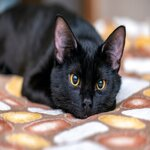

Enter the path to an image:
	black_cat.jpg
CPU times: user 11.6 s, sys: 111 ms, total: 11.7 s
Wall time: 19.3 s


Text(0.5, 1.0, 'N = 100')

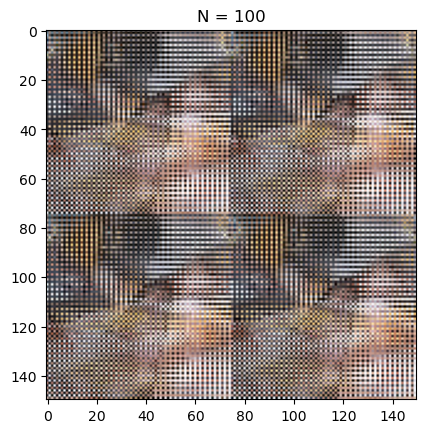

In [4]:
%%time
if __name__ == "__main__":
    path = input("Enter the path to an image:\n\t")
    while not os.path.exists(path):
        path = input("Couldn't find your chosen image, please try again:\n\t")   
result = main(path, iterations = 100)
#result.show()
plt.imshow(result)
plt.title("N = 100");

CPU times: user 22.8 s, sys: 129 ms, total: 23 s
Wall time: 23.4 s


Text(0.5, 1.0, 'N = 200')

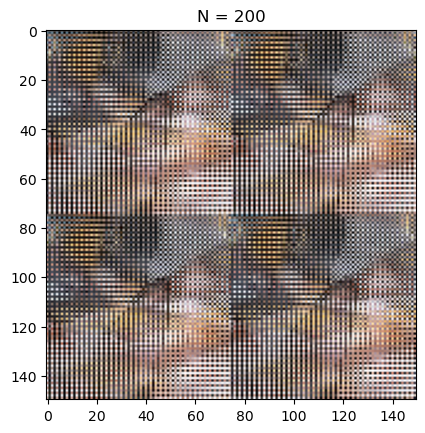

In [5]:
%%time
result = main(path='black_cat.jpg', iterations = 200)
plt.imshow(result)
plt.title("N = 200");

CPU times: user 37.9 s, sys: 286 ms, total: 38.2 s
Wall time: 39.8 s


Text(0.5, 1.0, 'N = 299')

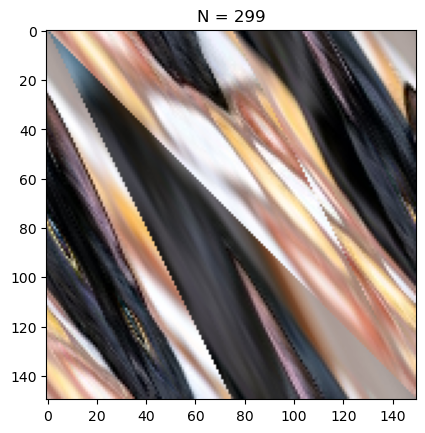

In [6]:
%%time
result = main(path='black_cat.jpg', iterations = 299)
plt.imshow(result)
plt.title("N = 299");

CPU times: user 30.9 s, sys: 181 ms, total: 31.1 s
Wall time: 31.4 s


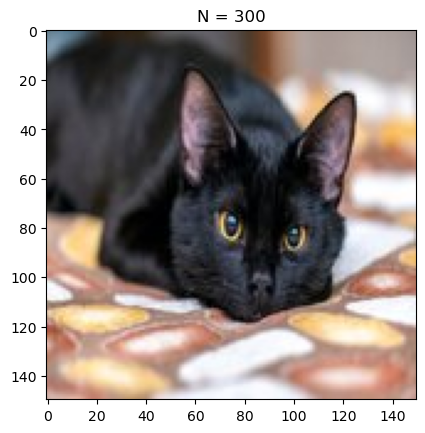

In [7]:
%%time
result = main(path='black_cat.jpg', iterations = 300)
plt.title("N = 300")
plt.imshow(result);

CPU times: user 35.1 s, sys: 246 ms, total: 35.3 s
Wall time: 36.5 s


Text(0.5, 1.0, 'N = 301')

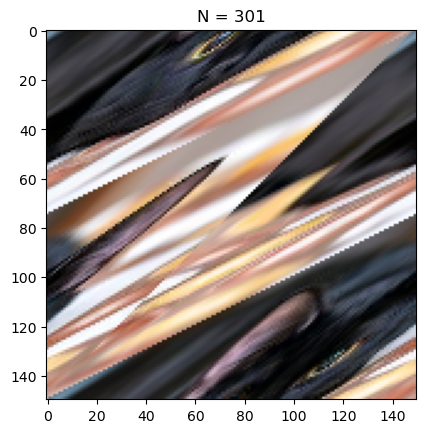

In [8]:
%%time
result = main(path='black_cat.jpg', iterations = 301)
plt.imshow(result)
plt.title("N = 301");

**Taken from John D Cook: https://www.johndcook.com/blog/2021/04/10/sarkovskys-theorem/
Need to resolve indentation errors, etc.**

In [5]:
# from sympy import factorint

# # Return whether m comes befor n in Sarkovsky order
# def before(m, n):

#     assert(m != n)

#     if m == 1 or n == 1:
#         return m > n

#     m_factors = factorint(m)
#     n_factors = factorint(n)

#     m_odd = 2 not in m_factors
#     n_odd = 2 not in n_factors
    
#     m_power_of_2 = len(m_factors) == 1 and not m_odd
#     n_power_of_2 = len(n_factors) == 1 and not n_odd

#     if m_odd:
#         return m < n
#     if n_odd:
#         else True
#         if m_power_of_2: 
#         return m > n if n_power_of_2 else False

#     # m is even and not a power of 2    
#     if n_odd:
#         return False
#     if n_power_of_2:
#         return True
#     if m_factors[2] < n_factors[2]: return True if m_factors[2] > n_factors[2]:
#         return False  
#     return m < n

SyntaxError: invalid syntax (829326049.py, line 23)

In [4]:
# sequence = np.random.Generator.uniform(low=0.0, high=1.0)
# sequence
gen = np.random.Generator(np.random.PCG64())
def with_numpy_gen(lo, hi, ss):
  return gen.choice(np.arange(lo, hi + 1), ss, replace=True)

In [5]:
with_numpy_gen(0,1, 200)

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0])

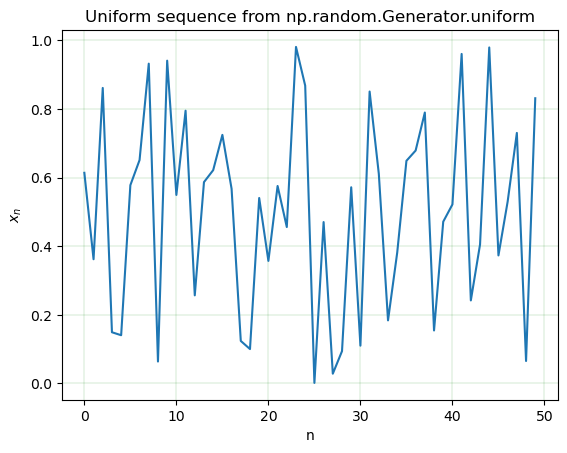

In [222]:
sequence = np.random.default_rng().uniform(0,1,50)
plt.plot(sequence)
plt.grid(color = 'green', linestyle = '-', linewidth = 0.125)
plt.xlabel("n")

plt.ylabel("$x_n$")
plt.title("Uniform sequence from np.random.Generator.uniform")
plt.savefig('uniform_plot.png', bbox_inches='tight')
plt.show()

In [169]:
sequence.mean()

0.5009197542347147

Text(0.5, 1.0, 'Uniform sequence from np.random.Generator.uniform')

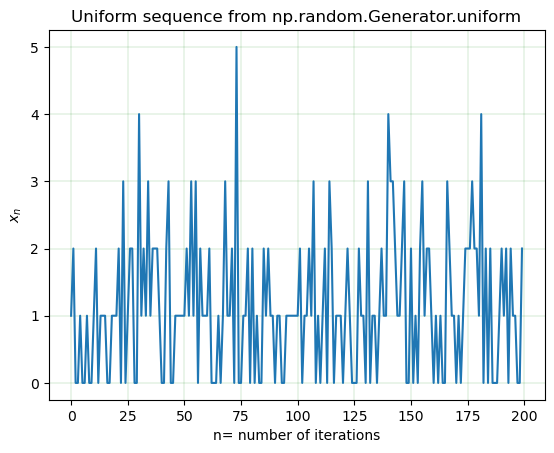

In [82]:
sequence = np.random.default_rng().poisson(1,200)
plt.plot(sequence)
plt.grid(color = 'green', linestyle = '-', linewidth = 0.125)
plt.xlabel("n= number of iterations")

plt.ylabel("$x_n$")
plt.title("Uniform sequence from np.random.Generator.uniform")

Text(0.5, 1.0, 'Uniform sequence from np.random.Generator')

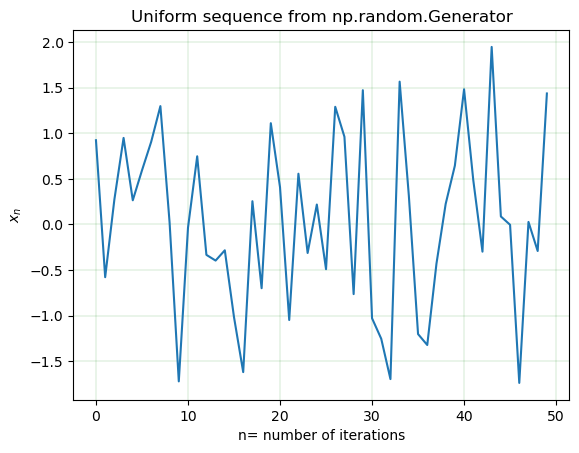

In [256]:
sequence = np.random.default_rng().normal(0,1,50)
plt.plot(sequence)
plt.grid(color = 'green', linestyle = '-', linewidth = 0.125)
plt.xlabel("n= number of iterations")

plt.ylabel("$x_n$")
plt.title("Uniform sequence from np.random.Generator")

In [5]:
def logistic_seq(r, x0, n):
    logistic_array = np.array([Decimal(x0)])
    #logistic_array = [x0]
    x_tmp = Decimal(x0)
    for j in range(n):
        
        x_tmp = Decimal(r )* Decimal(x_tmp)*(Decimal('1')-Decimal(x_tmp))
       #  logistic_array.append(x_tmp)
#         print(x_tmp)
        logistic_array = np.append(logistic_array, x_tmp)
#         print(logistic_array)
    return logistic_array

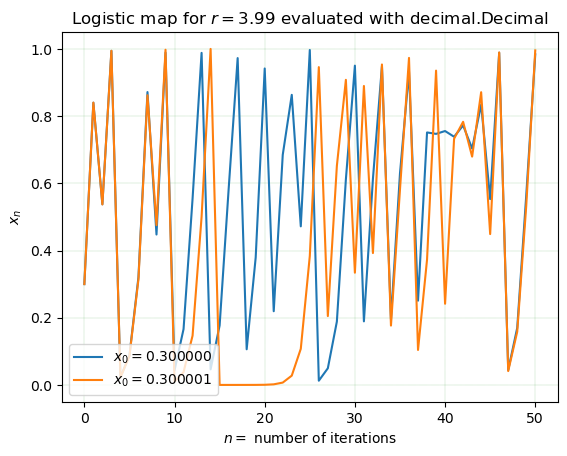

In [10]:
sequence_log1 = logistic_seq(4, 0.3000, 50)
sequence_log2 = logistic_seq(4, 0.3001, 50)

plt.plot(sequence_log1, label = "$x_0 = 0.300000$")
plt.plot(sequence_log2, label = "$x_0 = 0.300001$")
plt.grid(color = 'green', linestyle = '--', linewidth = 0.125)
plt.xlabel("$n=$ number of iterations")
plt.ylabel("$x_n$")
plt.legend(loc=3)
plt.title("Logistic map for $r = 3.99$ evaluated with decimal.Decimal")
plt.savefig('logistic_plot.png', bbox_inches='tight')
plt.show()

**$x_{n+1} = r x_n (1-x_n)$**

$z_{n+1} = z_n^2 + c$

$z = x + i y, \, \, \, \, i = +\sqrt{-1}$

In [224]:
sequence_log2.mean()

Decimal('0.4616674733654831540460431218')

In [225]:
sequence_log1.mean()

Decimal('0.5105281889577739950704287714')

In [257]:
def uniform_proposal(x, delta=0.5):
    return np.random.default_rng().normal(x - delta, x + delta)

def metropolis_sampler(p, nsamples, proposal=uniform_proposal, domain = (0, 1)):
    x = 0.5 # start somewhere
    n_samples = 0
    while n_samples < nsamples:
 #   for i in range(nsamples):
        trial = proposal(x)
        if trial < domain[0] or trial > domain[1]:
            continue
        # random neighbour from the proposal distribution
        acceptance = p(trial)/p(x)

        # accept the move conditionally
        if np.random.uniform() < acceptance:
            x = trial
        n_samples += 1

        yield x

In [258]:
p = lambda x: 1/(4*np.pi * np.sqrt(x*(1-x)))
#p = lambda x: x
samples = list(metropolis_sampler(p, 50, domain=(0, 1)))

In [259]:
len(samples)

50

In [260]:
np.mean(np.array(samples))

0.24100502479856462

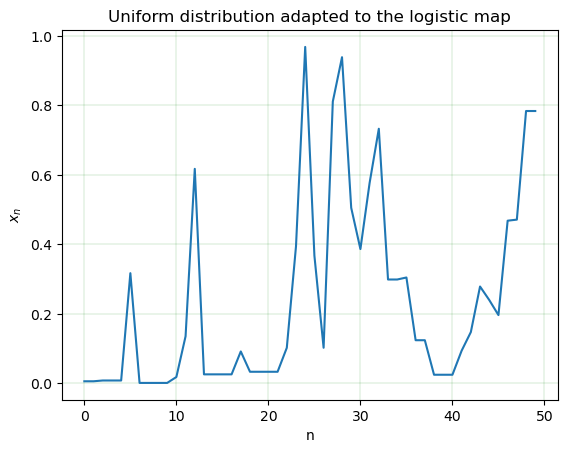

In [262]:
plt.plot(samples)
plt.grid(color = 'green', linestyle = '-', linewidth = 0.125)
plt.xlabel("n")

plt.ylabel("$x_n$")
plt.title("Uniform distribution adapted to the logistic map")
plt.savefig('uniform_plot_normalised.png', bbox_inches='tight')
plt.show()

In [13]:
# The library mpmath is a good solution
import sympy as smp
import mpmath as mp
mp.mp.dps = 50  # Computation precision is 50 digits
# Notice that the difference between x and y is in the digit before last (47th)
x = mp.mpf("0.910221324013388510820732335560023784637451171875")
y = mp.mpf("0.910221324013388510820732335560023784637451171865")
x - y  # Must be equal to 1e-47 as the difference is on the 47th digit
mp.mpf('1.000014916280995001003481719184726944958705912691304e-47')

mpf('1.000014916280995001003481719184726944958705912691304e-47')

# Predicting Integer Sequences from the OEIS (Classifier + Time Series)

On predicting integer sequences:
   - The online encyclopedia:
   https://oeis.org/
   Users can contribute and the numbers are approved later. They provide a file with all the sequences, which can be seen as multiple time series. They are of different lengths due to reasons: some may have nice closed form expressions or recurrence relations which can be found from the Ids, some may not be calculated yet, some are too large to be included, etc. For instance the number of one dimensional integer partitions of a natural number grows really fast
   
   - one paper: Can machine learning identify interesting mathematics? An exploration using empirically observed laws
   
   https://arxiv.org/abs/1805.07431
   
   Chai Wah Wu (2018) They use various classifiers
   - Kaggle challenge: https://www.kaggle.com/c/integer-sequence-learning

Goal and Considerations:
- abcd
- abcd

In [9]:
oeis = pd.read_csv('oeis_stripped.csv', header=None, sep='\n')
oeis = oeis[0].str.split(',', expand=True)
oeis = oeis[4:]
oeis = oeis.set_index(0)
oeis

,1,2,3,4,5,6,7,8,9,10,...,369,370,371,372,373,374,375,376,377,378
0,,,,,,,,,,,,,,,,,,,,,
A000001,0,1,1,1,2,1,2,1,5,2,...,None,None,None,None,None,None,None,None,None,None
A000002,1,2,2,1,1,2,1,2,2,1,...,None,None,None,None,None,None,None,None,None,None
A000003,1,1,1,1,2,2,1,2,2,2,...,None,None,None,None,None,None,None,None,None,None
A000004,0,0,0,0,0,0,0,0,0,0,...,None,None,None,None,None,None,None,None,None,None
A000005,1,2,2,3,2,4,2,4,3,4,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A358412,1,5391411025,5164037398437051798923642083026622326955987448...,,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
A358413,180,1018976683725,5164037398437051798923642083026622326955987448...,,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
A358414,27720,1853070540093840001956842537745897243375,,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [10]:
oeis.columns

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            369, 370, 371, 372, 373, 374, 375, 376, 377, 378],
           dtype='int64', length=378)

In [11]:
oeis.describe()

,1,2,3,4,5,6,7,8,9,10,...,369,370,371,372,373,374,375,376,377,378
count,358107,358107,358098,357978,357343,355576,352803,349394,345866,341520,...,1,1,1,1,1,1,1,1,1,1
unique,10860,18903,30595,44381,59443,73327,84956,97089,104736,110234,...,1,1,1,1,1,1,1,1,1,1
top,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,1,
freq,170213,76093,42429,30328,23764,24060,22127,16450,15576,19714,...,1,1,1,1,1,1,1,1,1,1


In [ ]:
# result = df.groupby('region').apply(lambda grp: pd.Series(
#     grp.vdem_corr.values)).unstack(level=1).T

# Closed Form Symbolic Expressions/Recurrence Relations for Values (Classifier + Transformers)

On guessing the symbolic expressions:
   - End-to-end symbolic regression with transformers,    https://arxiv.org/abs/2201.04600
   
   Stéphane d'Ascoli, et al, 2022
   - Deep Symbolic Regression for Recurrent Sequences
   Stéphane d'Ascoli, et al, 2021,    https://arxiv.org/abs/2204.10532
   
   They use something called Transformers
   


Considerations:
- New architecture, could be too complicated to understand and implement
- Restrictions to Convex Domains?; one to one maps
- Recurrence Relations

# Dans Ma Rue, Event Prediction (or Classifier)

**Classifier problem?**

# Stacked Restricted Boltzmann Machines (RBMs) / Deep Belief Networks (Recommendation Systems)